<a href="https://colab.research.google.com/github/hslli-333/MPM_200_Huishan/blob/main/MPM200_Session5_HW_HuishanLi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.

####**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [1]:
hummingbird  = read.csv("Hummingbird_data.csv")

In [2]:
colnames(hummingbird)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

####**Q2. How many rows and columns are in the datafame**  
1 point

In [3]:
dim(hummingbird)

[1] 6908   12

There are **6908 rows** and **12 columns** in the datafame.

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
* Use the` sapply(`) function with class() to identify the data types of each column
* Discuss any observations or potential issues with the data types.

In [4]:
str(hummingbird)

'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(hummingbird, class)
print(hummingbird)

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [6]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(dplyr)
model_data = sample_n(hummingbird, 5000)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
print(model_data)

In [8]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "6/2/2011" "4/28/1999" "10/22/2015" "6/1/2010" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "malibu" "Lindsey" ...
 $ F_Aid             : chr  "No" "No" "Yes" "Yes" ...
 $ Species_e         : chr  "Non-selasphorus" "Non-selasphorus" "ANHU" "Non-selasphorus" ...
 $ Sex_e             : chr  "unknown" "unknown" "Female-like " "unknown" ...
 $ Age_e             : chr  "Nestling" "Nestling" "adult-like" "Nestling" ...
 $ Brought_in_after  : int  0 0 0 1 1 0 2 0 0 0 ...
 $ season            : chr  "Summer" "Spring" "Fall" "Summer" ...
 $ r                 : chr  "unknown" "nest-related" "found on the ground" "found on the ground" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "4235_ANHU" "1610_ANHU" "6534_ANHU" "3973_ANHU" ...


In [9]:
write.csv(model_data, "Hummingbird_data_HuishanLi.csv", row.names = FALSE)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

####**Q3: How many rows and columns are present in your data frame currently?**  
1 Point

I have 5000 rows and 12 columns


####**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?**  
2 Points**

**8 columns** are categorical variables, they are:

'Disposition_binary', 'Place', 'F_Aid', 'Species_e', 'Sex_e', 'season', 'r', 'Green_Orange'

**4 columns** are continuous variables, they are:

'Admitted', 'Age_e', 'Brought_in_after', 'ID'


####**Q5: Submit your model_data file along with your submission.**
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [10]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [11]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4148
Santa Barbara,71
malibu,781


In [12]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [13]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

ggsave("Number of rescued hummingbirds.pdf", p, width = 4, height = 3, units = "in", dpi = 300)

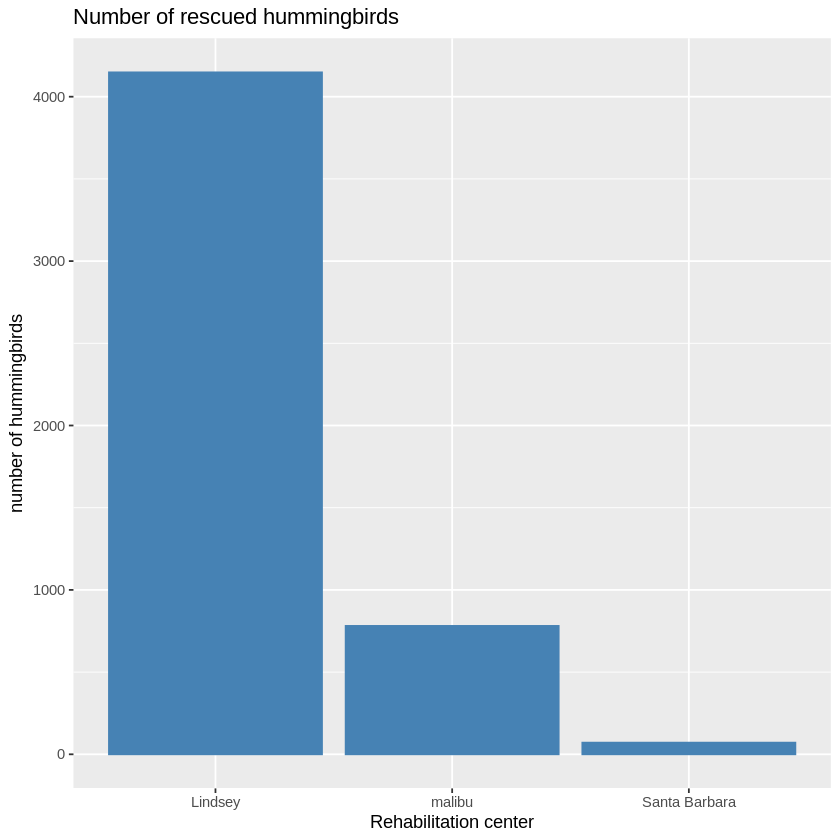

In [14]:
p

####**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.**  
Point: 2**  

####**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.**  
Points: 2**  

rehab = model_data  %>% ：creat a new dataframe named

1.   rehab = model_data  %>% ：creat a new dataframe named rehab.
2.   group_by(Place)%>% : divide data into different group var place column.
3.   summarise(count = n_distinct(ID)) : count the number of hummingbirds of each rehab center.
4.  p = ggplot(rehab, aes(x = Place, y = count)) + : setting of the plot, set the plot as p, set reheb center name as x axis and number of hummingbirds as y axis.
5. geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+  ： set the color of the bars in the plot
6. xlab('Rehabilitation center')+ ylab('number of hummingbirds')+ : set the titles of x axis and y axis
7. labs(title = "Number of rescued hummingbirds") : set the title of the plot
8. p : print the plot p

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

####**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?**
Points: 5**

the 5 covariates from data columns that I think might affect the survival are :  Species_e, Sex_e, Age_e, season, r



1.   Within each covariates I list, most of the died numbers are greater then the release numbers. But the specie ANHU, female-like, adult-like and found on groud will have a higher chance of having a death ending.
2.   I don't think all the covariates I list will be  associated with survival.
3. Calculate the mortality rate or survival rate of each covariates and then compare.


In [15]:
df = model_data  %>%
group_by(Species_e, Sex_e, Age_e, season, r )%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e', 'Sex_e', 'Age_e', 'season'.
You can override using the `.groups` argument.


In [16]:
df

Species_e,Sex_e,Age_e,season,r,count
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
ANHU,Female-like,adult-like,Fall,caught by domestic animal,81
ANHU,Female-like,adult-like,Fall,found inside,24
ANHU,Female-like,adult-like,Fall,found on the ground,125
ANHU,Female-like,adult-like,Fall,nest-related,3
ANHU,Female-like,adult-like,Fall,suspect torpor-like state,11
ANHU,Female-like,adult-like,Fall,unknown,27
ANHU,Female-like,adult-like,Fall,window hit,49
ANHU,Female-like,adult-like,Spring,caught by domestic animal,170
ANHU,Female-like,adult-like,Spring,found inside,37


In [17]:
covariate1 = model_data%>%
group_by(Species_e,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.


In [18]:
covariate1

Species_e,Disposition_binary,count
<chr>,<chr>,<int>
ANHU,Died,2333
ANHU,Released,845
BCHU,Died,15
BCHU,Released,12
Non-selasphorus,Died,349
Non-selasphorus,Released,608
Selasphorus,Died,524
Selasphorus,Released,314


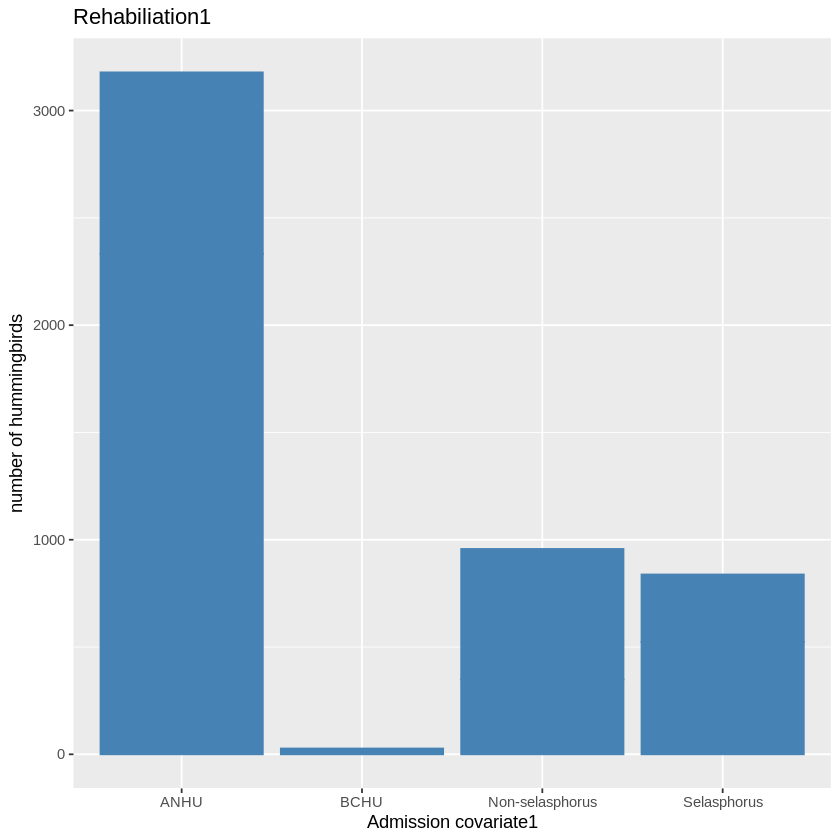

In [19]:
p1 = ggplot(covariate1, aes(x = Species_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate1')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation1 ")
p1

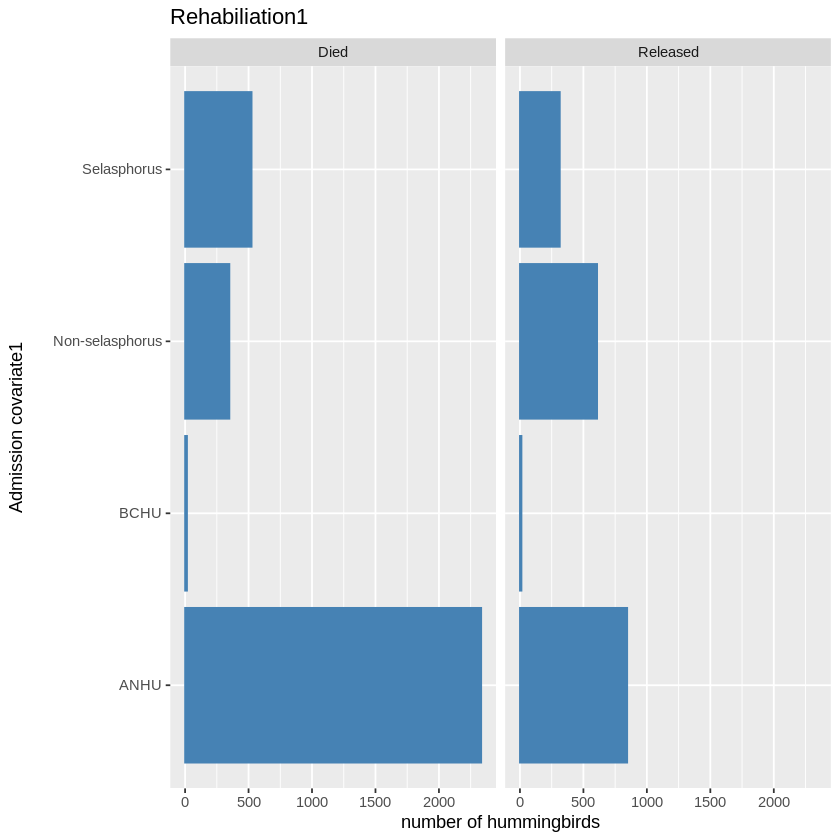

In [20]:
p1 + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [21]:
covariate2 = model_data%>%
group_by(Sex_e,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


In [22]:
covariate2

Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2339
Female-like,Released,921
Male,Died,452
Male,Released,114
unknown,Died,430
unknown,Released,744


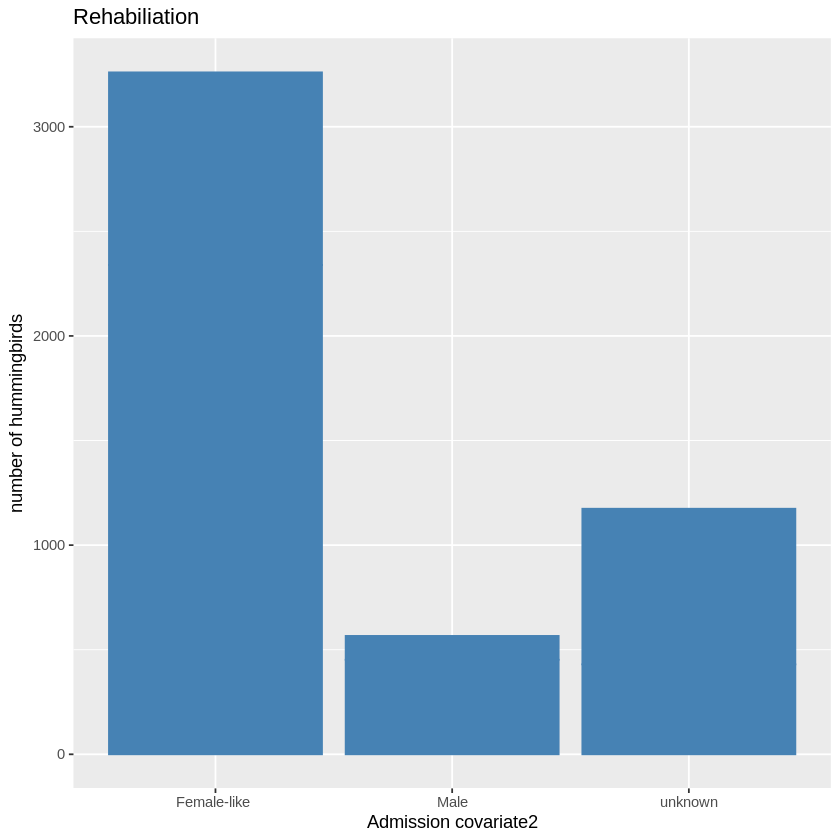

In [23]:
p2 = ggplot(covariate2, aes(x = Sex_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate2')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation ")
p2

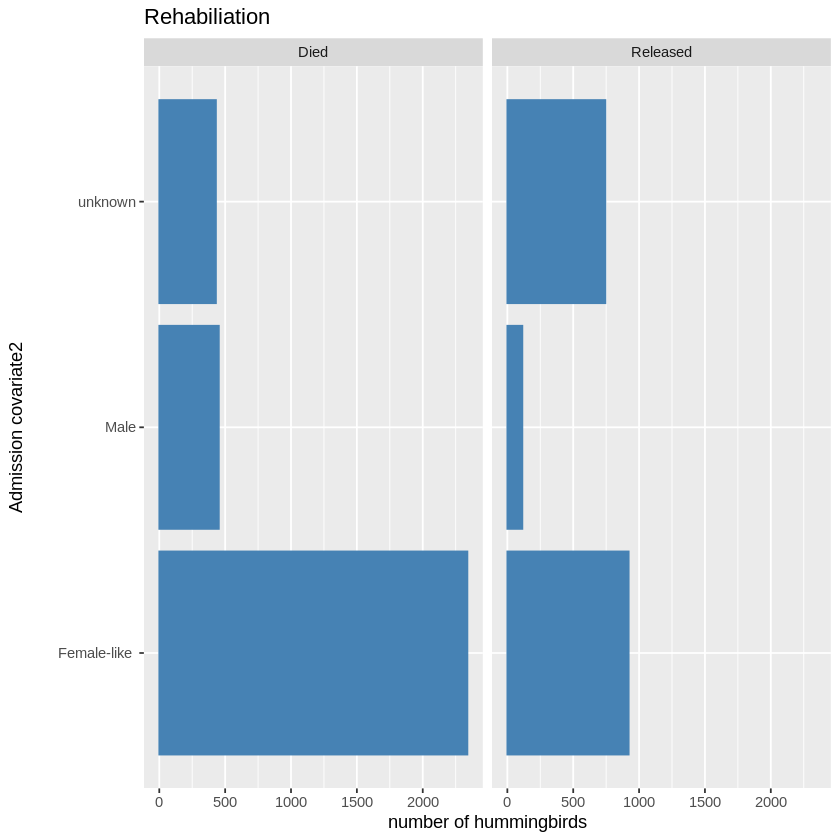

In [24]:
p2 + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [25]:
covariate3 = model_data%>%
group_by(Age_e,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [26]:
covariate3

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,422
Nestling,Released,744
adult-like,Died,2799
adult-like,Released,1035


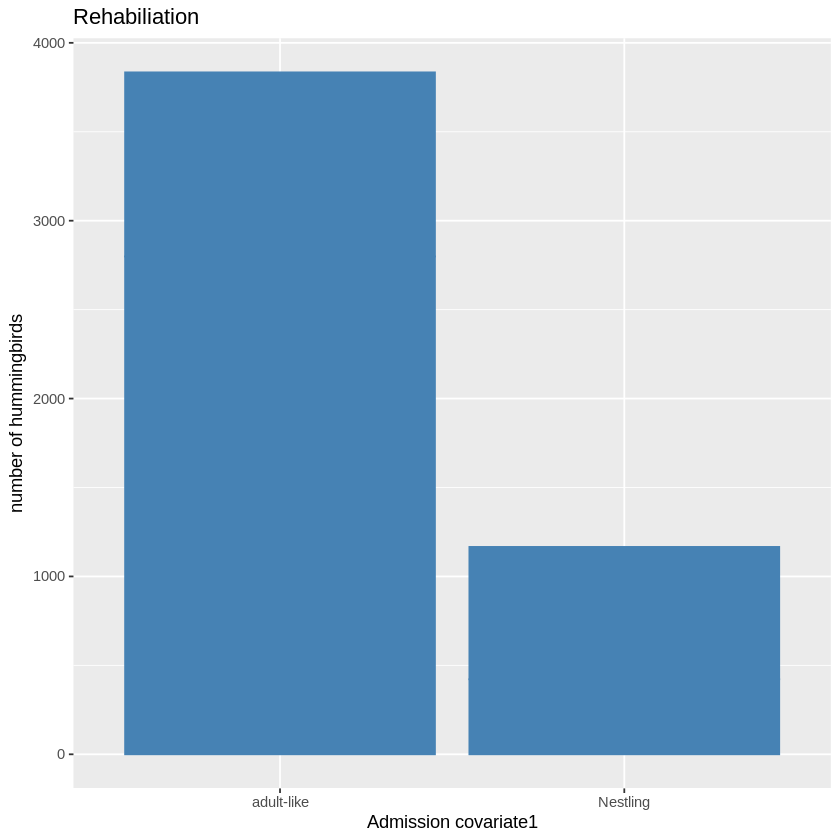

In [27]:
p3 = ggplot(covariate3, aes(x = Age_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate1')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation ")
p3

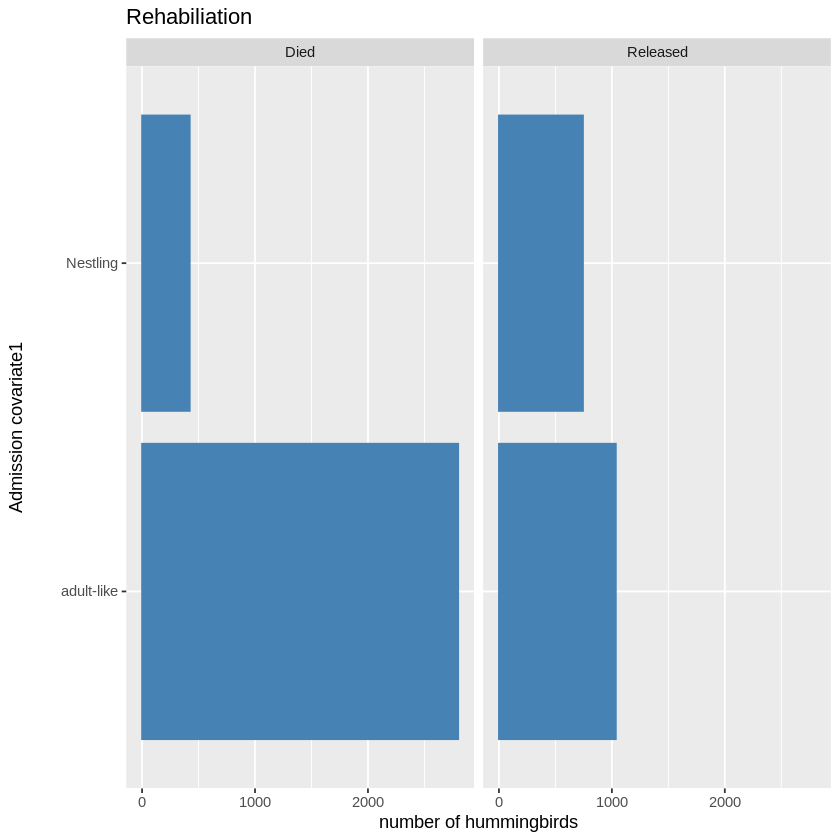

In [28]:
p3 + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [29]:
covariate4 = model_data%>%
group_by(season,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [30]:
covariate4

season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,381
Fall,Released,60
Spring,Died,1344
Spring,Released,955
Summer,Died,944
Summer,Released,570
Winter,Died,552
Winter,Released,194


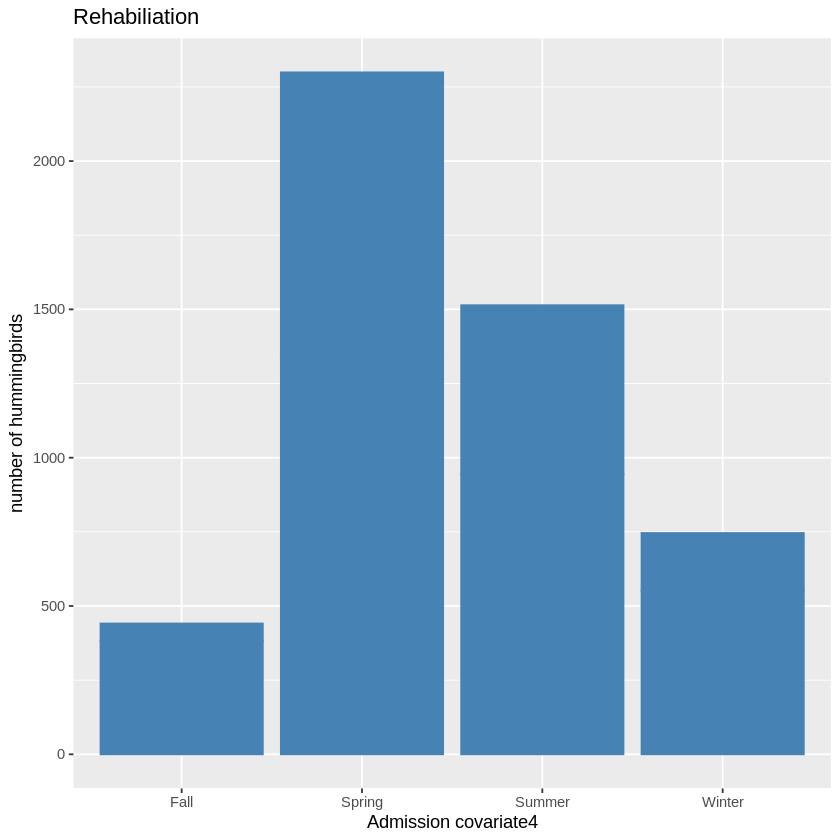

In [31]:
p4 = ggplot(covariate4, aes(x = season, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate4')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation ")
p4

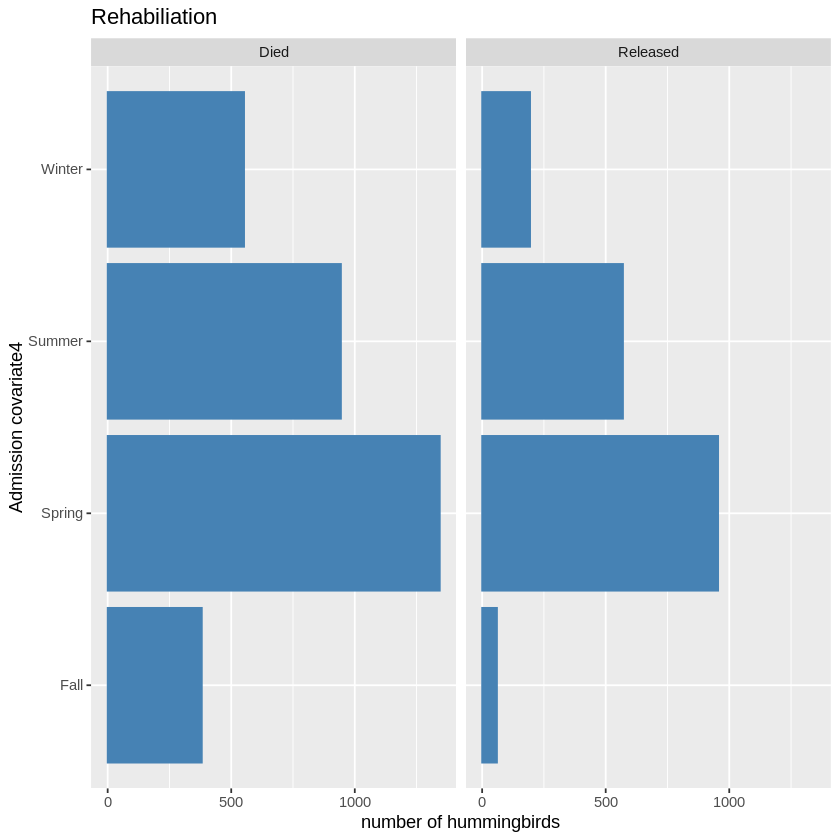

In [32]:
p4 + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [33]:
covariate5 = model_data%>%
group_by(r,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [34]:
covariate5

r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,474
caught by domestic animal,Released,193
found inside,Died,116
found inside,Released,41
found on the ground,Died,1424
found on the ground,Released,707
nest-related,Died,267
nest-related,Released,414
suspect torpor-like state,Died,89


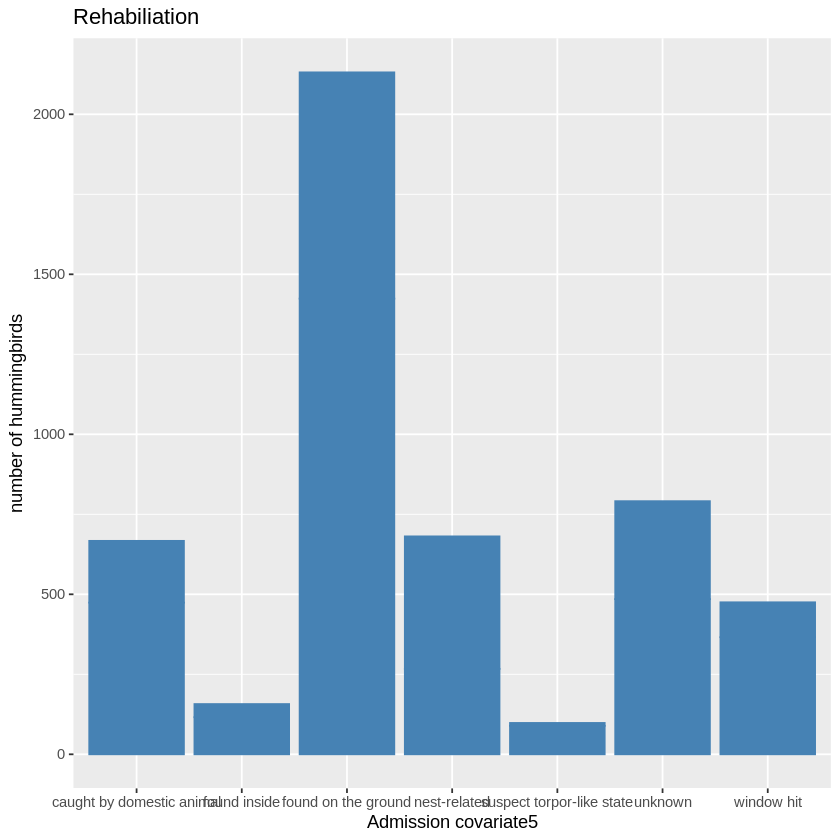

In [35]:
p5 = ggplot(covariate5, aes(x = r, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate5')+ ylab('number of hummingbirds')+
labs(title = "Rehabiliation ")
p5

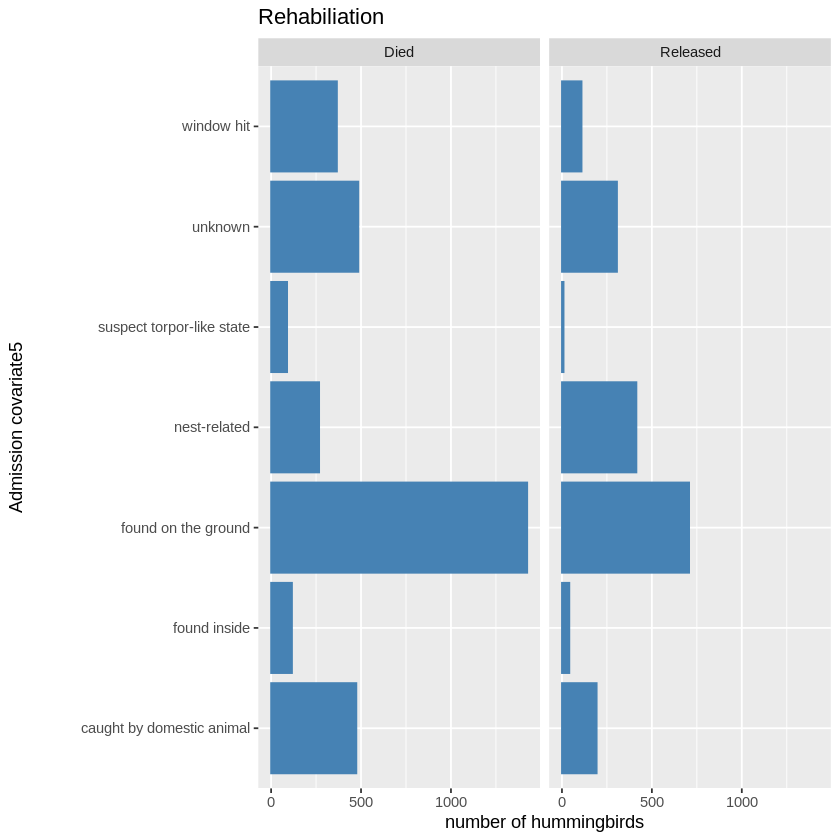

In [36]:
p5 + facet_grid(. ~ Disposition_binary)+ coord_flip()

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
* Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .
* Plot a bar chart to visualize these proportions.



**proportion:**

*  Lindsey	Died: 0.6512301

*  Lindsey	Released: 0.3487699

*  Santa Barbara	Died:	0.5714286

*  Santa Barbara	Released:	0.4285714

*  malibu	Died:	0.6096939

*  malibu	Released:	0.3903061




In [37]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


In [38]:
proportions

Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2696,0.6499518
Lindsey,Released,1452,0.3500482
Santa Barbara,Died,41,0.5774648
Santa Barbara,Released,30,0.4225352
malibu,Died,484,0.6197183
malibu,Released,297,0.3802817


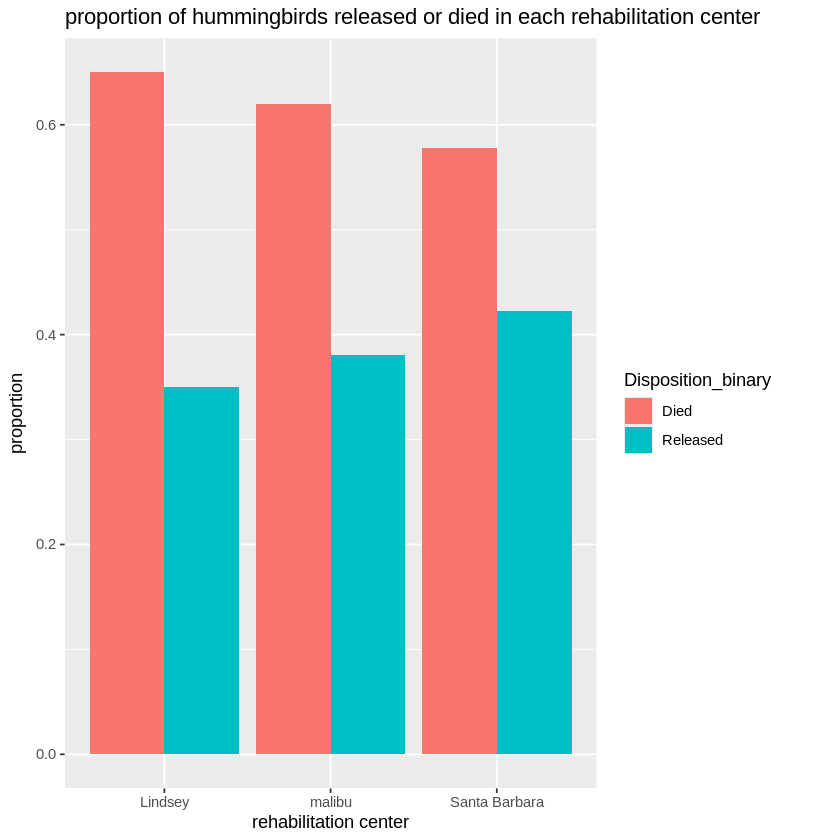

In [39]:
# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab('rehabilitation center') +
  ylab('proportion') +
  labs(title = 'proportion of hummingbirds released or died in each rehabilitation center')

** Merging Species into Groups/Families **
### **Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).**
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

*In Non-selasphorus group the survival rate is much greater than death rate, while in the selasphorus group survival rate is slightly smaller than the death rate.*

In [ ]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == ______ ________, _________)

In [40]:
model_data$Species_group = ifelse(
  grepl("Anna's Hummingbird", model_data$Species_e, ignore.case = TRUE) |
  grepl("Black-chinned Hummingbird", model_data$Species_e, ignore.case = TRUE) |
  grepl("non-selasphorous", model_data$Species_e, ignore.case = TRUE),
  "Non-selasphorus",
  ifelse(grepl("Selasphorus", model_data$Species_e, ignore.case = TRUE),
    "Selasphorus",
    "Non-selasphorus"
  )
)

In [41]:
# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group) %>%
  summarise(count = n_distinct(ID))

In [42]:
species_distribution

Species_group,count
<chr>,<int>
Non-selasphorus,3205
Selasphorus,1795


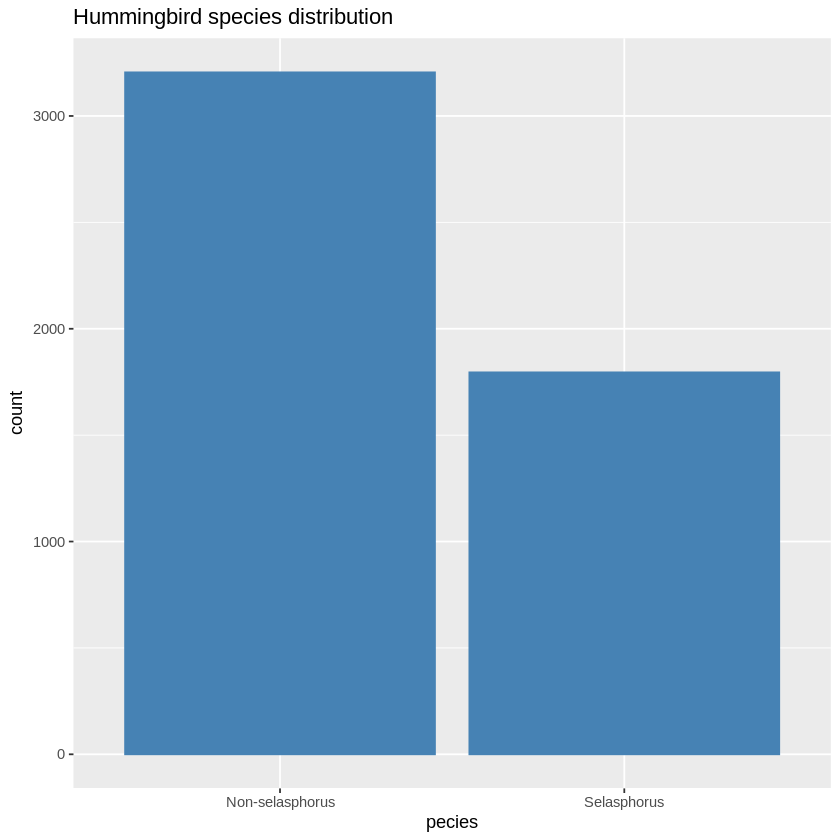

In [43]:
ggplot(species_distribution, aes(x = Species_group, y = count, fill = Non-selasphorus)) +
  geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') +
  xlab('pecies') +
  ylab('count') +
  labs(title = 'Hummingbird species distribution')

In [44]:
proportions2 = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Species_group) %>%
  mutate(proportion2 = count / sum(count))

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


In [45]:
proportions2

Species_group,Disposition_binary,count,proportion2
<chr>,<chr>,<int>,<dbl>
Non-selasphorus,Died,2348,0.7326053
Non-selasphorus,Released,857,0.2673947
Selasphorus,Died,873,0.4863510
Selasphorus,Released,922,0.5136490


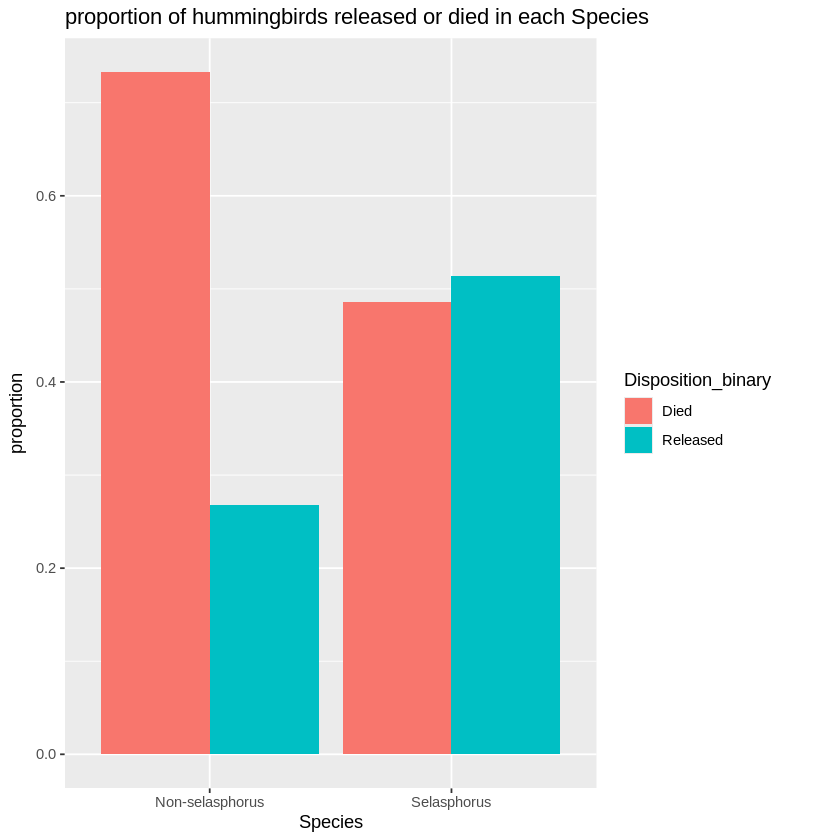

In [46]:
ggplot(proportions2, aes(x = Species_group, y = proportion2, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab('Species') +
  ylab('proportion') +
  labs(title = 'proportion of hummingbirds released or died in each Species')

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
* Summarize the trend of hummingbird admissions over time
* Plot the trend using `ggplot2`.

In [48]:
model_data$Admitted_date= as.Date(model_data$Admitted, format = "%m/%d/%Y")

####Q12a Please explain the argument `format` in code above
1. Tell the order and format to R.
2.  Make sure that the date can be parsed correctly to avoid missing data.
3. Convert the date of the character type into the Date type of R, which is convenient for date calculation and analysis.

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [49]:
admissions_by_month =  model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

In [50]:
admissions_by_month

Admitted_month,count
<chr>,<int>
01,234
02,375
03,775
04,864
05,660
06,821
07,471
08,222
09,145


In [51]:
admissions_by_year

Admitted_year,count
<chr>,<int>
1991,148
1992,130
1993,147
1994,139
1995,153
1996,146
1997,126
1998,147
1999,148


Finally, we can use `ggplot` to plot these timelines.

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat="identity", color = 'navy', fill = 'navy') +
  xlab('month') +
  ylab('number') +
  labs(title = 'Hummingbirds admissions by month')

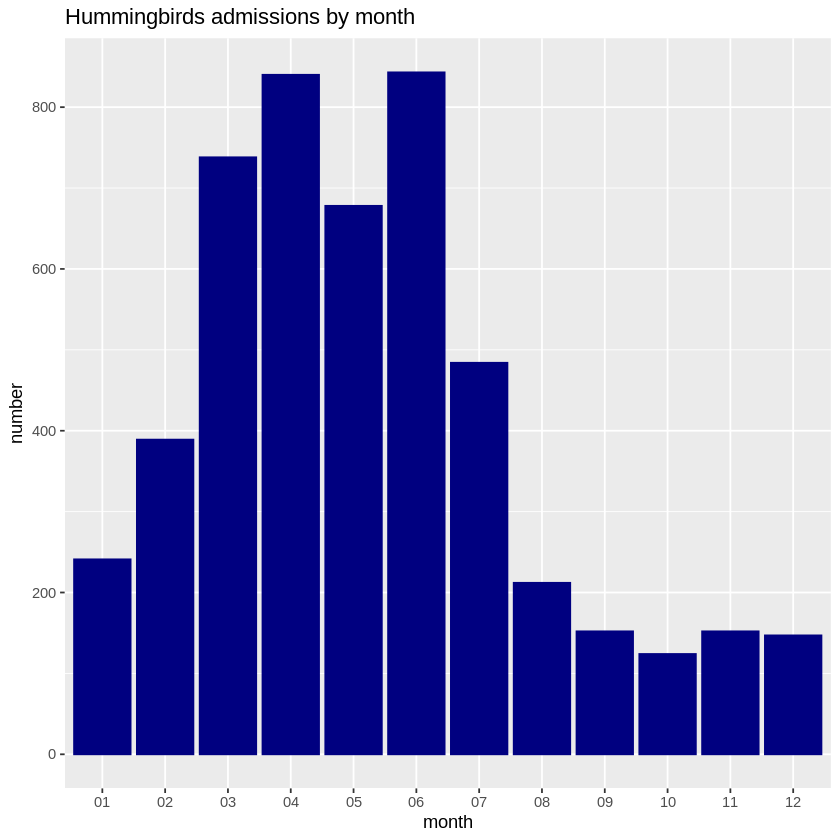

In [ ]:
p_month

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds
p_year  = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat="identity", color = 'blue', fill = 'blue') +
  xlab('year') +
  ylab('number') +
  labs(title = 'Hummingbirds admissions by year')

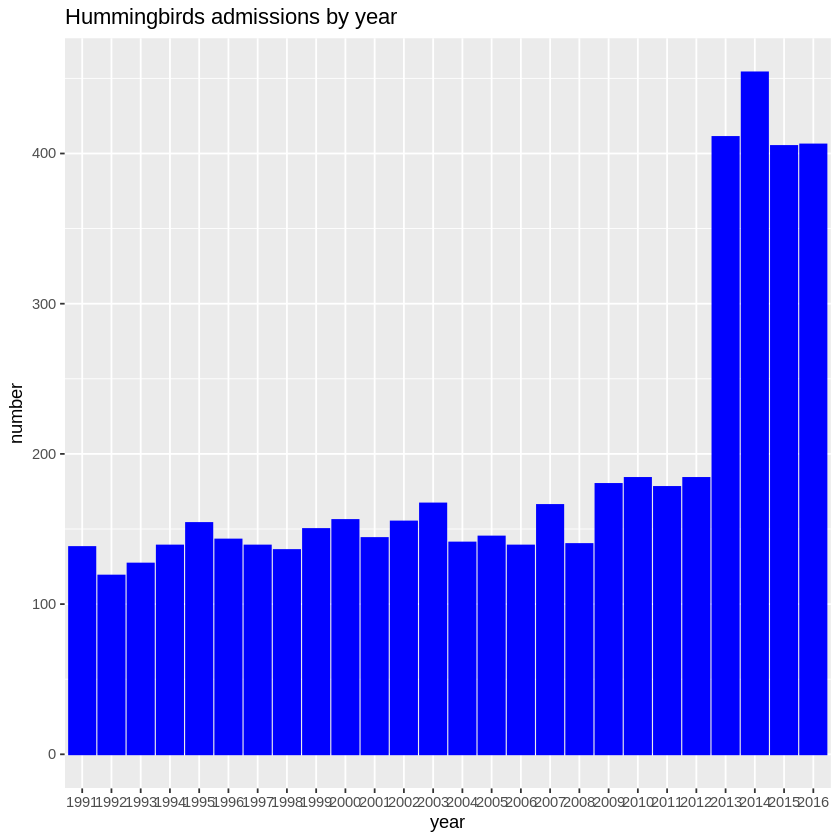

In [ ]:
p_year

In [68]:
admissions_by_species_m =  model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Admitted_month'. You can override using
the `.groups` argument.


In [69]:
admissions_by_species_m

Admitted_month,Species_group,count
<chr>,<chr>,<int>
01,Non-selasphorus,216
01,Selasphorus,18
02,Non-selasphorus,256
02,Selasphorus,119
03,Non-selasphorus,444
03,Selasphorus,331
04,Non-selasphorus,523
04,Selasphorus,341
05,Non-selasphorus,349


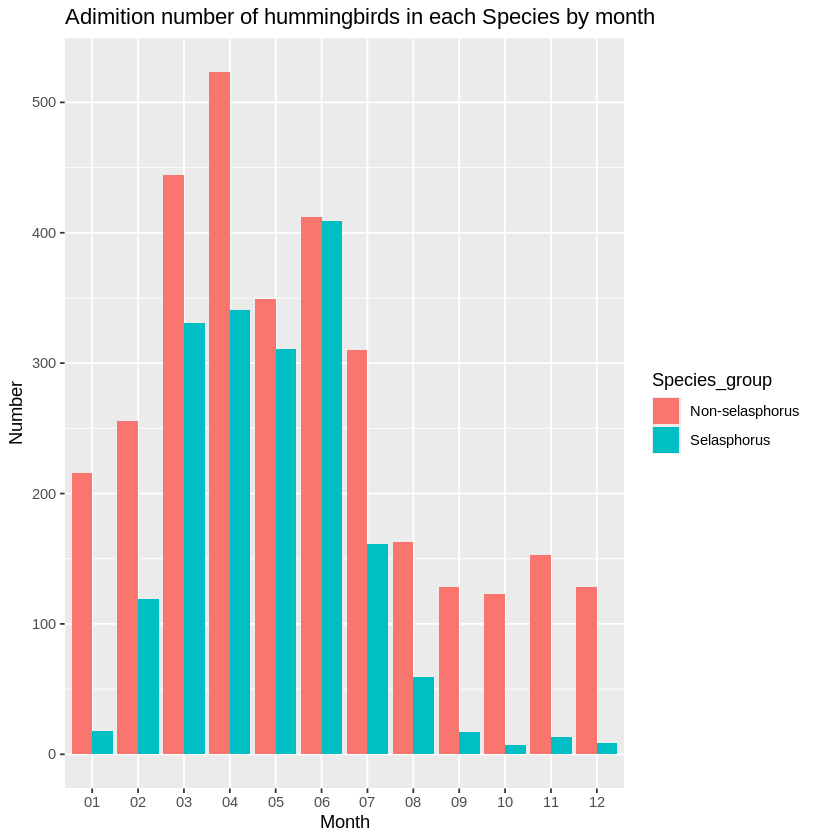

In [71]:
ggplot(admissions_by_species_m, aes(x = Admitted_month, y = count, fill = Species_group)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab('Month') +
  ylab('Number') +
  labs(title = 'Adimition number of hummingbirds in each Species by month')

In [72]:
admissions_by_species_y = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year, Species_group) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Admitted_year'. You can override using the
`.groups` argument.


In [73]:
admissions_by_species_y

Admitted_year,Species_group,count
<chr>,<chr>,<int>
1991,Non-selasphorus,107
1991,Selasphorus,41
1992,Non-selasphorus,96
1992,Selasphorus,34
1993,Non-selasphorus,104
1993,Selasphorus,43
1994,Non-selasphorus,98
1994,Selasphorus,41
1995,Non-selasphorus,105


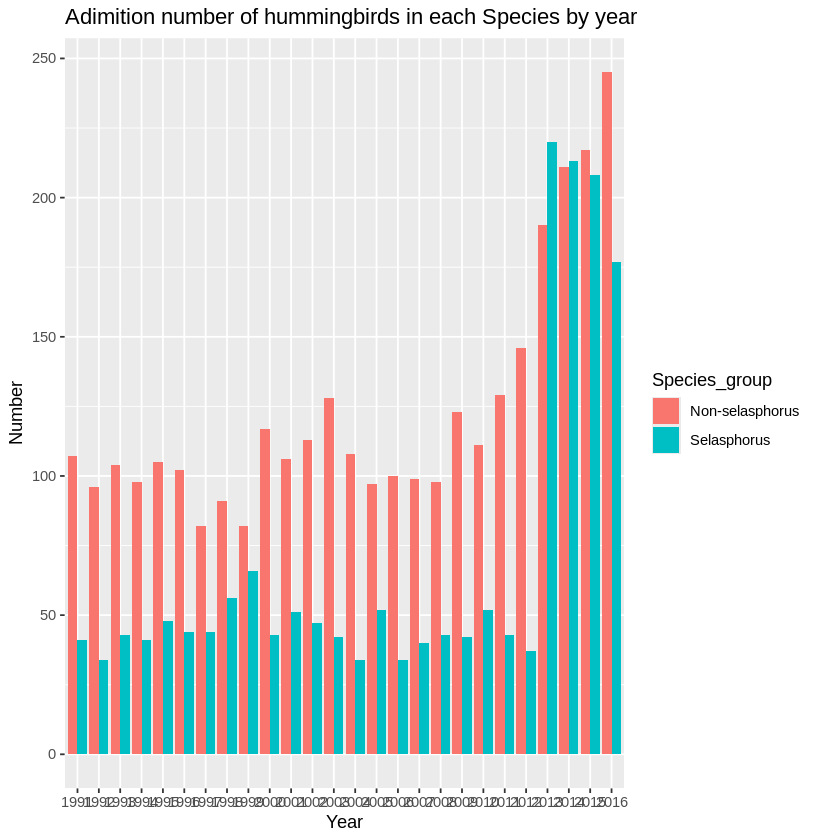

In [74]:
ggplot(admissions_by_species_y, aes(x = Admitted_year, y = count, fill = Species_group)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab('Year') +
  ylab('Number') +
  labs(title = 'Adimition number of hummingbirds in each Species by year')